# MLP

In this notebook, we will go through basics of MLP using MNIST dataset. We will implement this using two popular deep learning frameworks `Keras` and `PyTorch`. 

Here we will use [fastai](https://github.com/fastai/fastai/  "fastai's Tutorial").

Hey yo, but what is MLP? what is MNIST? 

Everything is explained in-detail in [blog post](dudeperf3ct.github.io). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

### Install Dependecies

In [1]:
!pip install --upgrade torch torchvision fastai numpy

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.0.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.2.1)
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.37)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)


# Fastai

In [2]:
# load all the required libraries
from fastai import *
from fastai.vision import *

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print (device)

defaults.cmap = 'gray'

cuda:0


## MNIST Dataset


 
The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples each of size 28 x 28 pixels. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Here is one example from dataset




In [3]:
# batch size
bs = 64

# transform the data
tfms = get_transforms(do_flip=False)

# load mnist data
path = untar_data(URLs.MNIST)
path

PosixPath('/root/.fastai/data/mnist_png')

In [4]:
(path/'training').ls(), (path/'testing').ls()

([PosixPath('/root/.fastai/data/mnist_png/training/7'),
  PosixPath('/root/.fastai/data/mnist_png/training/1'),
  PosixPath('/root/.fastai/data/mnist_png/training/3'),
  PosixPath('/root/.fastai/data/mnist_png/training/2'),
  PosixPath('/root/.fastai/data/mnist_png/training/9'),
  PosixPath('/root/.fastai/data/mnist_png/training/5'),
  PosixPath('/root/.fastai/data/mnist_png/training/0'),
  PosixPath('/root/.fastai/data/mnist_png/training/8'),
  PosixPath('/root/.fastai/data/mnist_png/training/4'),
  PosixPath('/root/.fastai/data/mnist_png/training/6')],
 [PosixPath('/root/.fastai/data/mnist_png/testing/7'),
  PosixPath('/root/.fastai/data/mnist_png/testing/1'),
  PosixPath('/root/.fastai/data/mnist_png/testing/3'),
  PosixPath('/root/.fastai/data/mnist_png/testing/2'),
  PosixPath('/root/.fastai/data/mnist_png/testing/9'),
  PosixPath('/root/.fastai/data/mnist_png/testing/5'),
  PosixPath('/root/.fastai/data/mnist_png/testing/0'),
  PosixPath('/root/.fastai/data/mnist_png/testing/8'),

In [0]:
# create databunch

data = (ImageItemList.from_folder(path, convert_mode='L') #Where to find the data? -> in path and its subfolders
        .random_split_by_pct()       #How to split it? Randomly with the default 20%
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder('testing')              #Optionally add a test set (here default name is test)
        .transform(tfms, size=28)                #Data augmentation? -> use tfms with a size of 28
        .databunch()                   #Finally? -> use the defaults for conversion to ImageDataBunch
        .normalize())                   

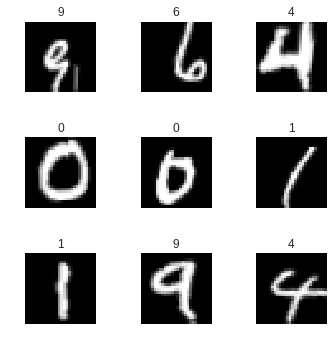

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

In [0]:
class mnist_model(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.n_classes =  data.c
    self.hidden = 150
    self.linear1 = nn.Linear(784, self.hidden, bias=True)
    self.linear2 = nn.Linear(self.hidden, self.n_classes, bias=True)
    
    
  def forward(self, x):
    x = x.view(-1, 28*28)
    h1 = F.relu(self.linear1(x))
    output = self.linear2(h1)
    return output

In [9]:
model = mnist_model().to(device)
print (model)
loss_func = nn.CrossEntropyLoss()

mnist_model(
  (linear1): Linear(in_features=784, out_features=150, bias=True)
  (linear2): Linear(in_features=150, out_features=10, bias=True)
)


In [0]:
learn = Learner(data, mnist_model(), loss_func=loss_func, metrics=[error_rate, accuracy])

epoch,train_loss,valid_loss,error_rate,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


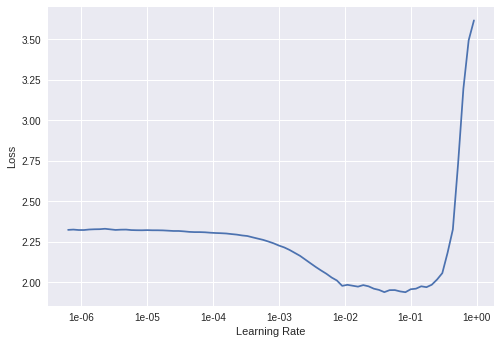

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.453305,0.277082,0.083286,0.916714
2,0.501641,0.288107,0.086214,0.913786
3,0.364740,0.194725,0.059500,0.940500
4,0.254852,0.121299,0.037500,0.962500
5,0.178972,0.097190,0.029857,0.970143


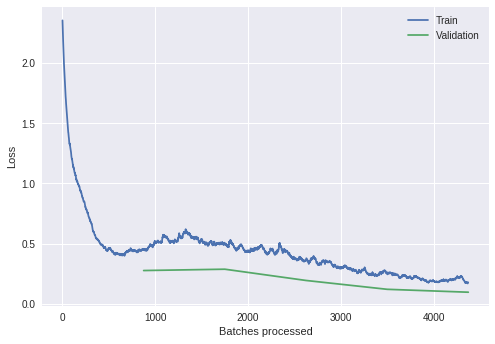

In [13]:
learn.recorder.plot_losses()

# Results

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

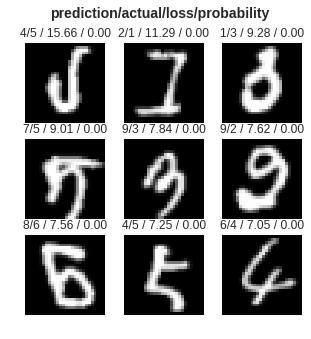

In [15]:

interp.plot_top_losses(9, figsize=(5, 5))

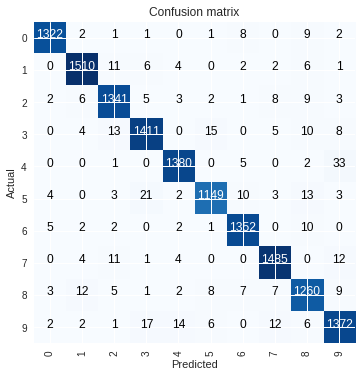

In [16]:
interp.plot_confusion_matrix(figsize=(5, 7))

In [17]:
interp.most_confused(min_val=2)

[('4', '9', 33),
 ('5', '3', 21),
 ('9', '3', 17),
 ('3', '5', 15),
 ('9', '4', 14),
 ('3', '2', 13),
 ('5', '8', 13),
 ('7', '9', 12),
 ('8', '1', 12),
 ('9', '7', 12),
 ('1', '2', 11),
 ('7', '2', 11),
 ('3', '8', 10),
 ('5', '6', 10),
 ('6', '8', 10),
 ('0', '8', 9),
 ('2', '8', 9),
 ('8', '9', 9),
 ('0', '6', 8),
 ('2', '7', 8),
 ('3', '9', 8),
 ('8', '5', 8),
 ('8', '6', 7),
 ('8', '7', 7),
 ('1', '3', 6),
 ('1', '8', 6),
 ('2', '1', 6),
 ('9', '5', 6),
 ('9', '8', 6),
 ('2', '3', 5),
 ('3', '7', 5),
 ('4', '6', 5),
 ('6', '0', 5),
 ('8', '2', 5),
 ('1', '4', 4),
 ('3', '1', 4),
 ('5', '0', 4),
 ('7', '1', 4),
 ('7', '4', 4),
 ('2', '4', 3),
 ('2', '9', 3),
 ('5', '2', 3),
 ('5', '7', 3),
 ('5', '9', 3),
 ('8', '0', 3)]